# 用Python分析《美女与野兽》

在一篇最近发表的论文*A quantitative analysis of gendered compliments in Disney Princess films*中，Carmen Fought和Karen Eisenhauer发现在这部迪士尼经典影片中女性角色的对话要多于迪士尼近期的电影作品。作者在网络上发现了美女与《野兽》的脚本，因此我立刻用Python重做了他们的分析。
<br />更多地，我在文章最后加入了对《玩具总动员》的分析，这个脚本的形式完全不同，但其中91%的对白来自男性角色。

点击下边的cell，点击上方工具栏里的执行图标，即可执行代码块，看到输出结果。代码块左边的In[]出现In[*]表示代码正在执行

In [1]:
from __future__ import division

import re
from collections import defaultdict

import requests
import pandas as pd
import matplotlib

%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
# Load the script which comes as a text file

script_url = 'http://www.fpx.de/fp/Disney/Scripts/BeautyAndTheBeast.txt'
script = requests.get(script_url).text

我们看下脚本的开篇：

In [3]:
# Let's look at the beginning of the script

script.splitlines()[:20]

['<pre>',
 'Beauty and the Beast',
 'The Complete Script',
 '',
 'Compiled by Ben Scripps <34rqnpq@cmuvm.csv.cmich.edu>',
 '',
 'NARRATOR:     Once upon a time, in a faraway land, a young prince lived in a',
 '              shining castle.  Although he had everything his heart desired,',
 '              the prince was spoiled, selfish, and unkind.  But then, one',
 "              winter's night, an old beggar woman came to the castle and",
 '              offered him a single rose in return for shelter from the bitter',
 '              cold. Repulsed by her haggard appearance, the prince sneered at',
 '              the gift and turned the old woman away, but she warned him not',
 '              to be deceived by appearances, for beauty is found within.  ',
 "              And when he dismissed her again, the old woman's ugliness",
 '              melted away to reveal a beautiful enchantress.  The prince',
 '              tried to apologize, but it was too late, for she had seen that'

再在中间随意选取一段：

In [4]:
# Let's look at a random place

script.splitlines()[500:520]

['MAURICE:      How did you find me?',
 'BELLE:        Oh, your hands are like ice.  We have to get you out of here.',
 'MAURICE:      Belle, I want you to leave this place.',
 "BELLE:        Who's done this to you?",
 'MAURICE:      No time to explain. You must go...now!',
 "BELLE:        I won't leave you!",
 "(Suddenly, BEAST grabs BELLE's shoulder and whips her around.  She drops the",
 'torch she was carrying into a puddle and the room is dark except for one beam',
 'of',
 'light from a skylight.)',
 'BEAST:        What are you doing here?',
 'MAURICE:      Run, Belle!',
 "BELLE:        Who's there? Who are you?",
 'BEAST:        The master of this castle.',
 "BELLE:        I've come for my father.  Please let him out!  Can't you see he's",
 '              sick?',
 "BEAST:        Then he shouldn't have trespassed here.",
 "BELLE:        But he could die.  Please, I'll do anything!",
 "BEAST:        There's nothing you can do.  He's my prisoner.",
 'BELLE:        Oh, there must be 

看上去很容易分析，因为角色和对白间用:隔开

In [5]:
# seems fairly easy to parse since 
# each new speaking line has : and begins with all caps

def remove_spaces(line):
    # remove the weird spaces
    return re.sub(' +',' ',line)

def remove_paren(line):
    # remove directions that are not spoken
    return re.sub(r'\([^)]*\)', '', line)


lines = []
line = ''
for row in script.splitlines():
    if ': ' in row and row[:3].upper() == row[:3]:
        line = remove_spaces(line)
        line = remove_paren(line)
        lines.append(line)
        line = row
    elif '          ' in row:
        line = line + ' ' + row.lstrip()
# don't forget the last line
lines.append(remove_spaces(line))

In [6]:
lines[:15]

['',
 "NARRATOR: Once upon a time, in a faraway land, a young prince lived in a shining castle. Although he had everything his heart desired, the prince was spoiled, selfish, and unkind. But then, one winter's night, an old beggar woman came to the castle and offered him a single rose in return for shelter from the bitter cold. Repulsed by her haggard appearance, the prince sneered at the gift and turned the old woman away, but she warned him not to be deceived by appearances, for beauty is found within. And when he dismissed her again, the old woman's ugliness melted away to reveal a beautiful enchantress. The prince tried to apologize, but it was too late, for she had seen that there was no love in his heart, and as punishment, she transformed him into a hideous beast, and placed a powerful spell on the castle, and all who lived there. Ashamed of his monstrous form, the beast concealed himself inside his castle, with a magic mirror as his only window to the outside world. The rose sh

看看结尾什么样：

In [7]:
# How does the end look

lines[-5:]

['LUMIERE: En garde, you overgrown pocket watch! ',
 'CHIP: Are they gonna live happily ever after, mama?',
 'MRS. POTTS: Of course, my dear. Of course.',
 'CHIP:  Do I still have to sleep in the cupboard?',
 'CHORUS: Certain as the sun Rising in the east Tale as old as time, song as old as rhyme Beauty and the beast! Tale as old as time, song as old as rhyme Beauty and the beast!']

In [8]:
# 我们去掉可能的空白行

print (len(lines))
lines = [l for l in lines if len(l) > 0]
print (len(lines))

690
689


现在，我们找出所有角色，并计算他们的出场次数（对白数）

In [9]:
# now figure out the roles and how many times they appear

roles = defaultdict(int)

for line in lines:
    # take advantage of the fact that the speaker is always listed before the :
    speaker = line.split(':')[0]
    roles[speaker] = roles[speaker] + 1

In [10]:
len(roles)

59

看一下每个角色出现的相对频率：

In [11]:
# take a look at the relative frequency of each role
roles

defaultdict(int,
            {' to think about': 1,
             'ALL': 14,
             'BAKER': 3,
             'BARBER': 1,
             'BEAST': 79,
             'BELLE': 137,
             'BIMBETTE 1': 1,
             'BIMBETTE 2': 1,
             'BIMBETTE 3': 1,
             'BIMBETTES': 2,
             'BOOKSELLER': 6,
             'BOTH': 3,
             'BYSTANDERS': 1,
             'CHIP': 24,
             'CHORUS': 1,
             'COGSWORTH': 60,
             'CRONY 1': 2,
             'CRONY 2': 1,
             'CRONY 3': 1,
             "D'ARQUE": 5,
             'DRIVER': 2,
             'GASTON': 66,
             'GROUP 1': 1,
             'GROUP 2': 1,
             'LEFOU': 35,
             'LUMIERE': 67,
             'MAN 1': 3,
             'MAN 2': 2,
             'MAN 3': 2,
             'MAN 4': 3,
             'MAN 5': 2,
             'MAN 6': 1,
             'MAURICE': 66,
             'MEN': 2,
             'MERCHANT': 2,
             'MOB': 7,
             'M

看起来有一行“to think about”是乱入的（恰好满足了parse条件），我们忽略它

In [12]:
# Looks like there is one bum line ('to think about'')
# But I'll ignore that for now.

# Quickly eye ball which roles are female and which are possibly mixed groups.

females = ['WOMAN 1',
           'WOMAN 2',
           'WOMAN 3',
           'WOMAN 4',
           'WOMAN 5',
           'OLD CRONIES',
           'MRS. POTTS',
           'BELLE',
           'BIMBETTE 1'
           'BIMBETTE 2',
           'BIMBETTE 3']

groups = ['MOB',
          'ALL',
          'BOTH']

将每一行对白根据角色性别进行标记，并统计不同性别的对白数量

In [13]:
# Mark each line of dialogue by sex and count them

sex_lines = {'Male':   0,
             'Female': 0}

for line in lines:
    # Extract speaker 
    speaker = line.split(':')[0]
    
    if speaker in females:
        sex_lines['Female'] += 1
        
    elif sex_lines not in groups:
        sex_lines['Male'] += 1

print (sex_lines)
print (sex_lines['Male']/(sex_lines['Male'] + sex_lines['Female']))

{'Male': 491, 'Female': 198}
0.7126269956458636


我们使用一张图来显示结果：

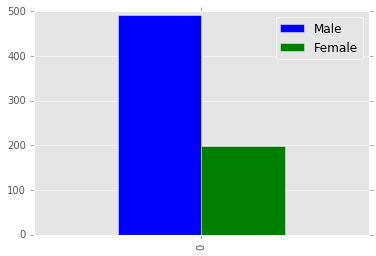

In [14]:
# Quick graphical representation 

df = pd.DataFrame([sex_lines.values()],columns=sex_lines.keys())
df.plot(kind='bar')

也许男性角色和女性角色的对白长度有明显不同？我们来看一看<br/>这次我们计算对白中单词数量而不是计算对白次数：

In [15]:
# Maybe men and women talk for different lengths? This counts words instead of 

sex_words = {'Male':   0,
             'Female': 0}

for line in lines:
    speaker = line.split(':')[0]
    dialogue = line.split(':')[1]  
    # remove the 
    # tokenize sentence by spaces
    word_count = len(dialogue.split(' ')) 
                    
    if speaker in females:
        sex_words['Female'] += word_count
    elif speaker not in groups:
        sex_words['Male'] += word_count

print (sex_words)
print (sex_words['Male']/(sex_words['Male'] + sex_words['Female']))

{'Male': 5359, 'Female': 2111}
0.7174029451137884


也用图表显示出来：

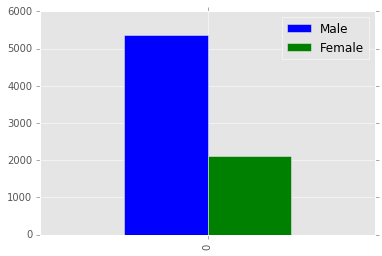

In [16]:
# Quick graphical representation 

df = pd.DataFrame([sex_words.values()],columns=sex_words.keys())
df.plot(kind='bar')

下面是额外的《玩具总动员》的分析

Sex
Female     78
Male      820
dtype: int64

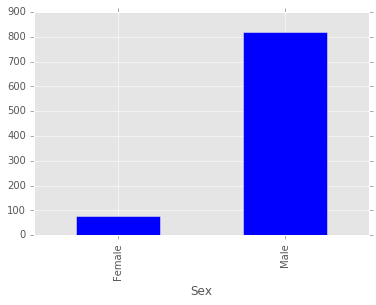

In [17]:
# Bonus toy story analysis

url = 'http://www.dailyscript.com/scripts/toy_story.html'
toy_story_script = requests.get(url).text

# toy_story_script.splitlines()[250:350]

lines = []
speaker = ''
dialogue = ''
for row in toy_story_script.splitlines()[90:]:
    if '                     ' in row: 
        if ':' not in speaker:
            lines.append( {'Speaker': remove_paren(speaker).strip(),
                           'Dialogue': remove_paren(dialogue).strip() } )
        
        speaker = remove_spaces(row.strip())
        dialogue = ''
    elif '            ' in row:
        dialogue = dialogue + ' ' + remove_spaces(row)
lines.append( {'Speaker': remove_paren(speaker).strip(),
               'Dialogue': remove_paren(dialogue).strip() } )

roles = defaultdict(int)

for line in lines:
    speaker = line['Speaker']
    roles[speaker] = roles[speaker] + 1

toy_story_df = pd.DataFrame(lines[1:])
toy_story_df.head()

toy_story_df.Speaker.value_counts()

def what_sex(speaker):
    if speaker in ["SID'S MOM", 'MRS. DAVIS', 'HANNAH', 'BO PEEP']:
        return 'Female'
    return 'Male'

toy_story_df['Sex'] = toy_story_df['Speaker'].apply(what_sex)

sex_df = toy_story_df.groupby('Sex').size()
sex_df.plot(kind='bar')
sex_df



Sex
Female     509
Male      6270
Name: Word Count, dtype: int64

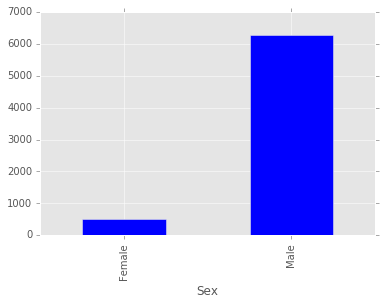

In [18]:
def word_count(dialogue):
    return len(dialogue.split())

toy_story_df['Word Count'] = toy_story_df['Dialogue'].apply(word_count)

word_df = toy_story_df.groupby('Sex')['Word Count'].sum()
word_df.plot(kind='bar')
word_df